In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


In [2]:
fashion_mninst = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fashion_mninst.load_data()

In [3]:
train_images[0].shape

(28, 28)

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels[0]

9

In [7]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

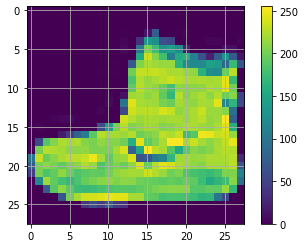

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [10]:
train_images=train_images/255.0

In [11]:
test_images=test_images/255.0

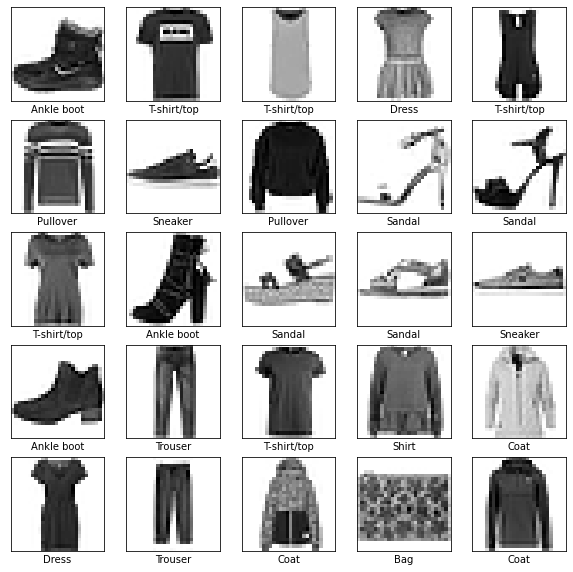

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential(
[
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
]
)

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
                
             )

In [15]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4916 - accuracy: 0.8276
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3701 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3327 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3103 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2921 - accuracy: 0.8925


In [16]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\n Test accuracy ',test_acc)
print('\n Test loss ',test_loss)


313/313 - 1s - loss: 0.3447 - accuracy: 0.8757

 Test accuracy  0.8756999969482422

 Test loss  0.3446924388408661


In [17]:
probability_model=tf.keras.Sequential(
[model,
tf.keras.layers.Softmax()]
)

In [18]:
predictions=probability_model.predict(test_images)

In [19]:
predictions[0]

array([1.7027463e-07, 1.0210658e-09, 7.2233711e-08, 1.1325154e-08,
       1.9886475e-07, 4.2541474e-03, 5.6162099e-07, 1.7547781e-02,
       7.0941672e-07, 9.7819638e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img=true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f} %({})".format(class_names[predicted_label],
                                   100*np.max(predictions_array),
                                   class_names[true_label]),
                                   color=color)
    
def plot_value_array(i,predictions_array,true_label):
    true_label=true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

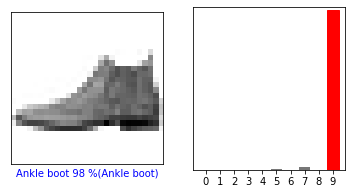

In [22]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(1,predictions[i],test_labels)
plt.show()


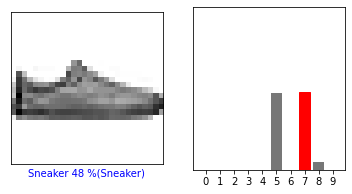

In [23]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(1,predictions[i],test_labels)
plt.show()

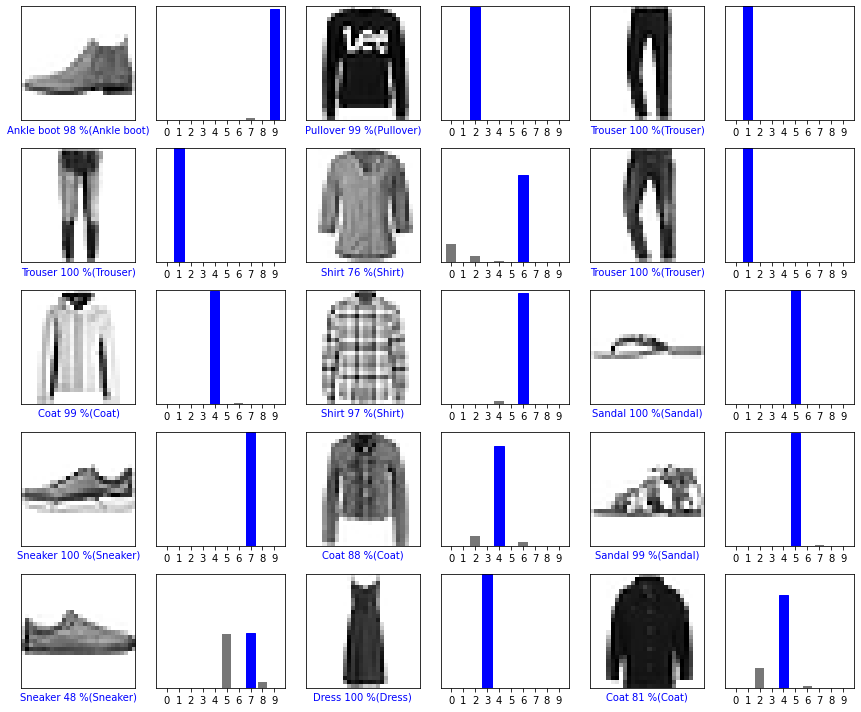

In [24]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()


In [25]:
img=test_images[1]
print(img.shape)

(28, 28)


In [26]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [27]:
predictions_single=probability_model.predict(img)
print(predictions_single)

[[9.7712118e-06 1.5645629e-12 9.9395657e-01 6.2848704e-09 3.2538064e-03
  9.8152679e-15 2.7799236e-03 2.5403474e-14 2.5825559e-08 8.5818896e-15]]


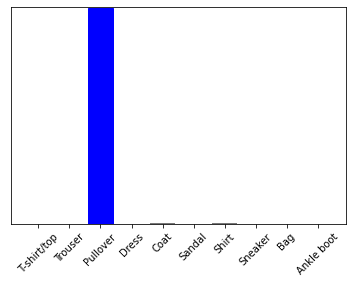

In [28]:
plot_value_array(1,predictions_single[0],test_labels)
_=plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2